<a href="https://colab.research.google.com/github/Kekon130/ML_Practica2/blob/main/practica2_continuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
# Importación de librerías
%pip install xgboost
import numpy as np
import pandas as pd
import sklearn.compose as Compose
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from xgboost import XGBClassifier

from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [156]:
train_url = "https://raw.githubusercontent.com/Kekon130/ML_Practica2/main/train.csv"
df_train = pd.read_csv(train_url)

test_url = "https://raw.githubusercontent.com/Kekon130/ML_Practica2/main/test.csv"
df_test = pd.read_csv(test_url)

#pd.set_option('display.max_columns', None)
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.54,5120.795000,6.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,42636,39869,7,Hendrik Sackmannb,50.0,217529489.0,Media_Manager,107761.29,9047.107500,4.0,...,Standard,34.09,41.899992,211.0,Yes,0.000000,150.220682,High_spent_Large_value_payments,984.123010,Standard
79996,114031,38305,2,Alexj,33.0,98861902.0,Scientist,16218.32,1098.526667,6.0,...,Bad,4466.33,24.275710,98.0,NM,64.533114,34.457893,High_spent_Small_value_payments,260.523798,Poor
79997,85991,9976,6,Luciana Lopezi,25.0,745835485.0,Engineer,29374.77,2377.897500,3.0,...,Standard,1189.37,38.439021,241.0,NM,40.264074,22.234178,High_spent_Medium_value_payments,403.980355,Standard
79998,21240,13193,7,Edward Krudyd,15.0,894419091.0,Manager,43782.45,3543.537500,6.0,...,Bad,3468.25,24.233841,85.0,Yes,240.664739,42.839562,Low_spent_Large_value_payments,146.741586,Poor



## Analizando las columnas

In [157]:
# Customer ID. 
# Esta se deja tal cual y no se toca, la necesitamos

# df_train['Month'].plot(kind='hist', edgecolor='black')

correlation = df_train["Annual_Income"].corr(df_train["Credit_Utilization_Ratio"])


correlation 

0.17574735571150576

Estas dos variables tienen poca correlación

In [158]:


#df_train[["Payment_of_Min_Amount", "Credit_Score"]] = OrdinalEncoder().fit_transform([["Payment_of_Min_Amount", "Credit_Score"]])


#df_train.groupby('Payment_of_Min_Amount')['Credit_Score'].plot(kind='kde')


In [159]:
def transformar_valores(columna, decimal):
  for index, row in df_train.iterrows():
    df_train.loc[index, columna] = round(df_train.loc[index, columna], decimal)

"""
transformar_valores("Annual_Income", -4)
transformar_valores("Monthly_Inhand_Salary", -3)
transformar_valores("Changed_Credit_Limit", -1)
transformar_valores("Outstanding_Debt", -2)
transformar_valores("Credit_Utilization_Ratio", 1)
transformar_valores("Total_EMI_per_month", -1)
transformar_valores("Amount_invested_monthly", -1)
transformar_valores("Monthly_Balance", -2)"""


'\ntransformar_valores("Annual_Income", -4)\ntransformar_valores("Monthly_Inhand_Salary", -3)\ntransformar_valores("Changed_Credit_Limit", -1)\ntransformar_valores("Outstanding_Debt", -2)\ntransformar_valores("Credit_Utilization_Ratio", 1)\ntransformar_valores("Total_EMI_per_month", -1)\ntransformar_valores("Amount_invested_monthly", -1)\ntransformar_valores("Monthly_Balance", -2)'

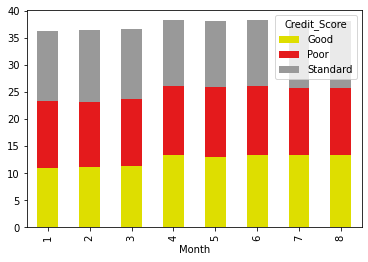

In [160]:
# Month
# Representa el mes del año en el que se actualizó la información

# Podemos ver cómo el mes no influye casi nada, los valores están prácticamente igual repartidos 
plot = pd.crosstab(index=df_train['Month'],
            columns=df_train["Credit_Score"]
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True, color=['#dede00', '#e41a1c', '#999999'])


In [161]:
# Name
# Esta variable la vamos a borrar, ya que tiene bastantes menos valores que el Customer_ID y ello puede dar problemas para el tratamiento posterior. Además no nos aporta nada.

In [162]:
# Age
# Edad -> Clasificar en tres grupos (va desde los 14 años hasta los 59)        juventud (14 - 26)           adultez (27 - 40)          otro (41 - 59)

# Vemos la realcion de edad con la bariable objetivosss
y = df_train["Credit_Score"]

y_numerico = OrdinalEncoder().fit_transform(df_train[["Credit_Score"]])
# Malos: Son terribles desde los 18 a los 45 años, en ese rango de valores hay un huevo de malos, Luego a partir de los 46 años baja dráticamante el número, aunque esto puede estar ligado a que haya menos datos sobre este sector de edad, tendremos que revisar eso
# Estándar: La proporcion es muy parecida a los malos, a partir de los 45 varía bastante el numero
# Bueno: En este caso se mantiene estable a partir de los 18 años hasta el final

In [163]:
# SNN
df_train.Customer_ID.nunique()
df_train.SSN.nunique()                                  # La seguridad social la vamos a borrar entonces

# Ambos devuelven tienen el mismo numero, vamos, que cada uno va ligado a un mismo cliente.

12500

## Preprocesamiento

In [164]:
df_train = df_train.drop('Month', axis=1)           # todos iguales, no aporta nada
df_train = df_train.drop('Name', axis=1)            # identificador que no aporta información
df_train = df_train.drop('SSN', axis=1)             # identificador que no aporta información
df_train = df_train.drop('Occupation', axis=1)
df_train = df_train.drop('ID', axis=1)              # identificador que no aporta información
df_train = df_train.drop('Customer_ID', axis=1)     # identificador que no aporta información
df_train = df_train.drop('Credit_Score', axis=1)    # variable objetivo
df_train = df_train.drop('Age', axis=1)
df_train = df_train.drop('Type_of_Loan', axis=1)    # hay ~6200 valores en 10000 filas, demasiado disperso

                                                    # ahora igual pero en test
df_test = df_test.drop('Month', axis=1)           
df_test = df_test.drop('Name', axis=1)            
df_test = df_test.drop('SSN', axis=1)            
df_test = df_test.drop('Occupation', axis=1)
df_test = df_test.drop('ID', axis=1)              
df_test = df_test.drop('Customer_ID', axis=1)       
df_test = df_test.drop('Age', axis=1)
df_test = df_test.drop('Type_of_Loan', axis=1)

In [165]:
df_train

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,97384.44,8167.370000,1.0,3.0,8.0,1.0,20.0,12.0,0.52,3.0,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909
1,31369.58,2607.131667,8.0,9.0,27.0,8.0,30.0,25.0,19.70,6.0,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383
2,30171.86,2772.321667,6.0,7.0,30.0,9.0,49.0,18.0,23.49,10.0,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615
3,13100.02,1246.668333,7.0,5.0,6.0,5.0,6.0,20.0,10.64,8.0,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832
4,62313.54,5120.795000,6.0,2.0,18.0,4.0,27.0,8.0,12.82,9.0,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,107761.29,9047.107500,4.0,5.0,9.0,0.0,7.0,19.0,14.56,3.0,Standard,34.09,41.899992,211.0,Yes,0.000000,150.220682,High_spent_Large_value_payments,984.123010
79996,16218.32,1098.526667,6.0,6.0,21.0,5.0,44.0,19.0,8.98,6.0,Bad,4466.33,24.275710,98.0,NM,64.533114,34.457893,High_spent_Small_value_payments,260.523798
79997,29374.77,2377.897500,3.0,7.0,6.0,2.0,23.0,13.0,16.65,7.0,Standard,1189.37,38.439021,241.0,NM,40.264074,22.234178,High_spent_Medium_value_payments,403.980355
79998,43782.45,3543.537500,6.0,9.0,25.0,8.0,32.0,16.0,1.88,12.0,Bad,3468.25,24.233841,85.0,Yes,240.664739,42.839562,Low_spent_Large_value_payments,146.741586


In [166]:
print(len(df_train["Credit_Mix"].unique())) # Type_of_Loan: 6261 tipos, dropear
                                             # meter credit_mix 

3


In [167]:
df_train.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,97384.44,8167.370000,1.0,3.0,8.0,1.0,20.0,12.0,0.52,3.0,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909
1,31369.58,2607.131667,8.0,9.0,27.0,8.0,30.0,25.0,19.70,6.0,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383
2,30171.86,2772.321667,6.0,7.0,30.0,9.0,49.0,18.0,23.49,10.0,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615
3,13100.02,1246.668333,7.0,5.0,6.0,5.0,6.0,20.0,10.64,8.0,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832
4,62313.54,5120.795000,6.0,2.0,18.0,4.0,27.0,8.0,12.82,9.0,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902


In [168]:
oe = OrdinalEncoder()
mm = MinMaxScaler()

df_train[['Payment_of_Min_Amount']] = oe.fit_transform(df_train[['Payment_of_Min_Amount']])
df_test[['Payment_of_Min_Amount']] = oe.fit_transform(df_test[['Payment_of_Min_Amount']])

df_train[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
          'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount']] = mm.fit_transform(df_train[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
          'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 
          'Payment_of_Min_Amount']])



df_test[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
          'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount']] = mm.fit_transform(df_test[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
          'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 
          'Payment_of_Min_Amount']])

"""
scaler = Compose.ColumnTransformer(transformers=[
    ("Annual_Income", MinMaxScaler(), [0]),
    ("Monthly_Inhand_Salary", MinMaxScaler(), [0]),
    ("Num_Bank_Accounts", MinMaxScaler(), [0]),
    ("Num_Credit_Card", MinMaxScaler(), [0]),
    ("Interest_Rate", MinMaxScaler(), [4]),
    ("Num_of_Loan", MinMaxScaler(), [5]),
    ("Type_of_Loan", OrdinalEncoder(), [0]),           # que hay 6200 xD
    ("Delay_From_Due_Date", MinMaxScaler(), [6]),       # quiza un poco useless
    ("Num_of_Delayed_Payments", MinMaxScaler(), [7]),
    ("Num_Credit_Inquiries", MinMaxScaler(), [8]),
    ("Outstanding_Debt", MinMaxScaler(), [9]),
    ("Credit_Utilization_Ratio", MinMaxScaler(), [10]),
    ("Credit_History_Age", MinMaxScaler(), [11]),
    ("Payment_of_Min_Amount", OrdinalEncoder(), [12])
])
"""

df_train = pd.DataFrame(df_train)
df_train

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.522475,0.527732,0.090909,0.272727,0.212121,0.111111,0.322581,0.48,0.52,0.176471,Good,0.081079,0.421443,0.831266,0.5,77.284943,53.714219,High_spent_Large_value_payments,847.172909
1,0.140846,0.154586,0.727273,0.818182,0.787879,0.888889,0.483871,1.00,19.70,0.352941,Bad,0.852304,0.645850,0.354839,1.0,171.748418,44.990811,High_spent_Large_value_payments,280.855383
2,0.133922,0.165672,0.545455,0.636364,0.878788,1.000000,0.790323,0.72,23.49,0.588235,Bad,0.681550,0.467967,0.302730,1.0,205.403926,40.781489,High_spent_Large_value_payments,247.322615
3,0.035230,0.063286,0.636364,0.454545,0.151515,0.555556,0.096774,0.80,10.64,0.470588,Standard,0.145475,0.491575,0.317618,1.0,41.177132,23.005463,Low_spent_Large_value_payments,298.156832
4,0.319732,0.323277,0.545455,0.181818,0.515152,0.444444,0.435484,0.32,12.82,0.529412,Standard,0.163553,0.151513,0.300248,0.0,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.582464,0.586771,0.363636,0.454545,0.242424,0.000000,0.112903,0.76,14.56,0.176471,Standard,0.006775,0.730000,0.521092,1.0,0.000000,150.220682,High_spent_Large_value_payments,984.123010
79996,0.053257,0.053344,0.545455,0.545455,0.606061,0.555556,0.709677,0.76,8.98,0.352941,Bad,0.893606,0.142524,0.240695,0.0,64.533114,34.457893,High_spent_Small_value_payments,260.523798
79997,0.129314,0.139202,0.272727,0.636364,0.151515,0.222222,0.370968,0.52,16.65,0.411765,Standard,0.237931,0.614634,0.595533,0.0,40.264074,22.234178,High_spent_Medium_value_payments,403.980355
79998,0.212604,0.217428,0.545455,0.818182,0.727273,0.888889,0.516129,0.64,1.88,0.705882,Bad,0.693904,0.141128,0.208437,1.0,240.664739,42.839562,Low_spent_Large_value_payments,146.741586


## Entrenamiento

In [186]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
#          'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount'

X = df_train[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
              'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
              'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount']]




# validacion cruzada
X_train, X_test, y_train, y_test = train_test_split(X, y_numerico, test_size=0.3, random_state=42)

gnb = GaussianNB()
xgb = XGBClassifier(
    max_depth=9,
    learning_rate=0.1,
    n_estimators=1000,
    reg_alpha=1.1,
    colsample_bytree = 0.9, 
    subsample = 0.9,
    n_jobs = 5
)

#clf = LogisticRegression(random_state=42).fit(X_train, y_train).predict(X_test)



xgb.fit(X_train, y_train.ravel())#.predict(X_test)          
y_pred = xgb.predict(X_test)


print(f1_score(y_test, y_pred, average=None))           # esto está corregido
# print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

[0.73559894 0.79064477 0.80156037]


In [176]:
y_train

array([[2.],
       [2.],
       [0.],
       ...,
       [2.],
       [1.],
       [1.]])

## Fuentes

https://es.stackoverflow.com/questions/398654/como-ordenar-porcentajes-en-grafica-de-barras



Plot correlation in pandas

https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/


Tablas y cosas chulas

https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/